In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

In [8]:
df = pd.read_csv('data/combined_df_30jul.csv')

In [9]:
df = df.rename(columns={'Cyclone':'Hurricanes'})
df = df.drop(columns='Unnamed: 0')

In [10]:
geo_height = pd.read_csv('data/850mb_pressure.txt', delim_whitespace=True)
geo_height

,Year,height
0,1950,1433.210
1,1951,1445.915
2,1952,1439.970
3,1953,1444.429
4,1954,1418.463
...,...,...
68,2018,1450.784
69,2019,1455.467
70,2020,1442.928
71,2021,1451.844


In [11]:
trop_pressure = pd.read_csv('data/trop_pressure.txt', delim_whitespace=True)
trop_pressure

,Year,trop_pressure
0,1950,102.337
1,1951,102.909
2,1952,101.850
3,1953,103.257
4,1954,100.794
...,...,...
68,2018,101.836
69,2019,97.001
70,2020,95.444
71,2021,99.845


In [12]:
precip_water = pd.read_csv('data/500mb_precip_water.txt', delim_whitespace=True)
precip_water

,Year,precip_water
0,1950,37.798
1,1951,36.903
2,1952,38.458
3,1953,36.593
4,1954,35.463
...,...,...
68,2018,34.488
69,2019,36.515
70,2020,36.519
71,2021,35.500


In [13]:
off_coast_pressure = pd.read_csv('data/off_coast_pressure.txt', delim_whitespace=True)
off_coast_pressure

,Year,Off_Coast_Pressure
0,1950,105.590
1,1951,103.074
2,1952,103.078
3,1953,104.610
4,1954,103.549
...,...,...
68,2018,105.216
69,2019,100.269
70,2020,96.812
71,2021,101.311


In [14]:
geo_off_coast = pd.read_csv('data/geo_height_off_coast.txt', delim_whitespace=True)
geo_off_coast

,Year,geo_height_offcoast
0,1950,5816.625
1,1951,5838.646
2,1952,5829.713
3,1953,5827.335
4,1954,5804.761
...,...,...
68,2018,5847.219
69,2019,5861.475
70,2020,5856.811
71,2021,5862.449


In [15]:
meridional_flow = pd.read_csv('data/meridional_flow.txt', delim_whitespace=True)
meridional_flow

,Year,wind_value
0,1950,-1.972
1,1951,-1.965
2,1952,-1.781
3,1953,-1.631
4,1954,-2.072
...,...,...
68,2018,-2.162
69,2019,-2.100
70,2020,-2.113
71,2021,-2.056


In [16]:
df = df.merge(geo_height, on='Year', how='left')

In [17]:
df = df.merge(trop_pressure, on='Year', how='left')

In [18]:
df = df.merge(precip_water, on='Year', how='left')

In [19]:
df = df.merge(off_coast_pressure, on='Year', how='left')

In [20]:
df = df.merge(geo_off_coast, on='Year', how='left')

In [21]:
df = df.merge(meridional_flow, on='Year', how='left')

In [22]:
df_cleaned = df.copy()
df_cleaned['Cyclones_Binary'] = df_cleaned['Annual_Cyclones'].apply(lambda x: 1 if x > 0 else 0)

- preci_water is monolevel, 20-60lon, 10-20lat
- off_coast pressure Tropopause Pressure (mb)
Latitude Range used:   30.0 to  27.5
Longitude Range used:  75.0 to  80.0
- meridional flow  500mb Pressure Level v wind (m/s)
Latitude Range used:   20.0 to  12.5
Longitude Range used:  50.0 to  70.0

In [24]:
df_cleaned.describe()

,Year,Annual_Cyclones,Sahel_Annual,AMO_Annual,ENSO_Annual,TEMP_Annual,precip,Conus_temp,NE_temp,nao_sst,...,NJ_precip_x,NJ_precip_y,Hurricanes,height,trop_pressure,precip_water,Off_Coast_Pressure,geo_height_offcoast,wind_value,Cyclones_Binary
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,...,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,1986.000000,1.041096,1.531399,-0.005741,-0.020548,79.251233,0.131918,0.419315,0.591781,0.048411,...,0.020548,8.440548,0.232877,1447.036699,101.882055,33.972014,103.827904,5832.862247,-2.093438,0.643836
std,21.217131,0.992169,2.571764,0.194900,0.777576,0.861736,0.732506,1.088853,1.508196,0.583351,...,3.358072,3.358072,0.540590,13.123394,1.876783,2.325770,2.235909,15.153234,0.387481,0.482179
min,1950.000000,0.000000,-4.011811,-0.447500,-1.400000,77.200000,-1.490000,-1.940000,-2.400000,-1.418000,...,-5.110000,3.310000,0.000000,1406.623000,95.444000,29.742000,96.812000,5795.042000,-3.188000,0.000000
25%,1968.000000,0.000000,-0.200787,-0.139333,-0.625000,78.700000,-0.230000,-0.380000,-0.500000,-0.384000,...,-2.500000,5.920000,0.000000,1439.970000,100.787000,31.966000,102.513000,5822.107000,-2.328000,0.000000
50%,1986.000000,1.000000,1.468504,0.019333,0.025000,79.180000,0.070000,0.330000,0.300000,0.046000,...,-0.490000,7.930000,0.000000,1450.456000,101.850000,33.482000,103.731000,5834.918000,-2.072000,1.000000
75%,2004.000000,2.000000,3.515748,0.139083,0.450000,79.740000,0.650000,1.210000,1.600000,0.436000,...,2.080000,10.500000,0.000000,1456.751000,103.155000,35.500000,104.626000,5842.881000,-1.812000,1.000000
max,2022.000000,4.000000,6.952756,0.339667,1.775000,81.560000,1.530000,2.830000,3.900000,1.708000,...,14.370000,22.790000,2.000000,1467.682000,106.793000,38.895000,110.710000,5862.449000,-1.202000,1.000000


In [33]:
df_cleaned.to_csv('final_df.csv')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [32]:
data = df_cleaned.copy()
data['Annual_Cyclones_Binary'] = data['Annual_Cyclones'].apply(lambda x: 1 if x > 0 else 0)

# Define the features and targets
features = data.drop(columns=['Year', 'Annual_Cyclones', 'Hurricanes', 'Annual_Cyclones_Binary'])
target_annual_cyclones = data['Annual_Cyclones']
target_cyclone = data['Hurricanes']

# Split the data into training and testing sets
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(features, target_annual_cyclones, test_size=0.2, random_state=42)
X_train_cyclone, X_test_cyclone, y_train_cyclone, y_test_cyclone = train_test_split(features, target_cyclone, test_size=0.2, random_state=42)

# Initialize the models
rf_regressor = RandomForestRegressor(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Train the models
rf_regressor.fit(X_train_annual, y_train_annual)
rf_classifier.fit(X_train_cyclone, y_train_cyclone)

# Make predictions
y_pred_annual = rf_regressor.predict(X_test_annual)
y_pred_cyclone = rf_classifier.predict(X_test_cyclone)

# Evaluate the models
mse_annual = mean_squared_error(y_test_annual, y_pred_annual)
accuracy_cyclone = accuracy_score(y_test_cyclone, y_pred_cyclone)

print("Mean Squared Error for Annual Cyclones Prediction:", mse_annual)
print("Accuracy for Cyclone Prediction:", accuracy_cyclone)

Mean Squared Error for Annual Cyclones Prediction: 0.8049266666666668
Accuracy for Cyclone Prediction: 0.6666666666666666


In [14]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define parameter grid for Random Forest Regressor
param_grid_rf_reg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search_rf_reg = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                                  param_grid=param_grid_rf_reg, cv=5, n_jobs=-1, verbose=2)

# Fit Grid Search to the data
grid_search_rf_reg.fit(X_train_annual, y_train_annual)

# Best parameters and score
best_params_rf_reg = grid_search_rf_reg.best_params_
best_score_rf_reg = grid_search_rf_reg.best_score_

print("Best Parameters for Random Forest Regressor:", best_params_rf_reg)
print("Best Cross-Validation Score for Random Forest Regressor:", best_score_rf_reg)

# Define parameter distribution for Random Forest Classifier
param_dist_rf_clf = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=200, num=10)],
    'max_depth': [None] + [int(x) for x in np.linspace(10, 30, num=5)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Search
random_search_rf_clf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                          param_distributions=param_dist_rf_clf, n_iter=100,
                                          cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit Random Search to the data
random_search_rf_clf.fit(X_train_cyclone, y_train_cyclone)

# Best parameters and score
best_params_rf_clf = random_search_rf_clf.best_params_
best_score_rf_clf = random_search_rf_clf.best_score_

print("Best Parameters for Random Forest Classifier:", best_params_rf_clf)
print("Best Cross-Validation Score for Random Forest Classifier:", best_score_rf_clf)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_de

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=66; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; 

In [15]:
# Retrain the Random Forest Regressor with best parameters
best_rf_reg = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1, random_state=42)
best_rf_reg.fit(X_train_annual, y_train_annual)
y_pred_annual_best = best_rf_reg.predict(X_test_annual)
mse_annual_best = mean_squared_error(y_test_annual, y_pred_annual_best)

# Retrain the Random Forest Classifier with best parameters
best_rf_clf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)
best_rf_clf.fit(X_train_cyclone, y_train_cyclone)
y_pred_cyclone_best = best_rf_clf.predict(X_test_cyclone)
accuracy_cyclone_best = accuracy_score(y_test_cyclone, y_pred_cyclone_best)

mse_annual_best, accuracy_cyclone_best


(1.8775162506739733, 0.6666666666666666)

In [16]:
# Get feature importances for the tuned models
feature_importances_annual_best = best_rf_reg.feature_importances_
feature_importances_cyclone_best = best_rf_clf.feature_importances_

# Create DataFrame for better visualization
importance_df_annual_best = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances_annual_best})
importance_df_cyclone_best = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances_cyclone_best})

# Sort the DataFrames by importance
importance_df_annual_best = importance_df_annual_best.sort_values(by='Importance', ascending=False)
importance_df_cyclone_best = importance_df_cyclone_best.sort_values(by='Importance', ascending=False)

importance_df_annual_best, importance_df_cyclone_best


(         Feature  Importance
 13     NAO_Jones    0.143731
 0   Sahel_Annual    0.136449
 7        nao_sst    0.089924
 11    Nina_index    0.068269
 3    TEMP_Annual    0.068017
 4         precip    0.067246
 2    ENSO_Annual    0.060737
 12     TSA_index    0.057629
 6        NE_temp    0.050293
 10       AMM_sst    0.049734
 14      rh_value    0.045969
 5     Conus_temp    0.039741
 15   NJ_precip_x    0.026923
 16   NJ_precip_y    0.025369
 9        TNA_sst    0.024595
 1     AMO_Annual    0.023677
 8      nta_index    0.021697,
          Feature  Importance
 16   NJ_precip_y    0.102298
 15   NJ_precip_x    0.096124
 0   Sahel_Annual    0.090636
 14      rh_value    0.079164
 6        NE_temp    0.074029
 4         precip    0.064573
 3    TEMP_Annual    0.061519
 13     NAO_Jones    0.059457
 9        TNA_sst    0.056756
 11    Nina_index    0.052721
 12     TSA_index    0.051576
 7        nao_sst    0.046625
 1     AMO_Annual    0.044528
 2    ENSO_Annual    0.039868
 8      n

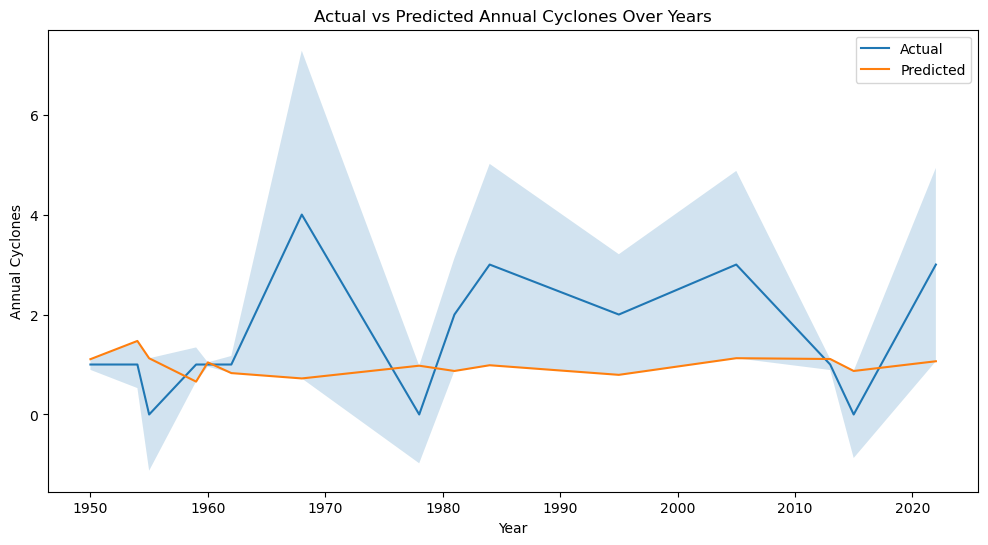

In [17]:
# Add year information to the test set
test_data_annual = X_test_annual.copy()
test_data_annual['Year'] = data.loc[X_test_annual.index, 'Year']
test_data_annual['Actual_Annual_Cyclones'] = y_test_annual
test_data_annual['Predicted_Annual_Cyclones'] = y_pred_annual_best

# Calculate the error
test_data_annual['Error_Annual_Cyclones'] = test_data_annual['Actual_Annual_Cyclones'] - test_data_annual['Predicted_Annual_Cyclones']

# Group by year and calculate mean absolute error
annual_errors_by_year = test_data_annual.groupby('Year')[['Actual_Annual_Cyclones', 'Predicted_Annual_Cyclones', 'Error_Annual_Cyclones']].mean()


plt.figure(figsize=(12, 6))
plt.plot(annual_errors_by_year.index, annual_errors_by_year['Actual_Annual_Cyclones'], label='Actual')
plt.plot(annual_errors_by_year.index, annual_errors_by_year['Predicted_Annual_Cyclones'], label='Predicted')
plt.fill_between(annual_errors_by_year.index, annual_errors_by_year['Actual_Annual_Cyclones'] - annual_errors_by_year['Error_Annual_Cyclones'].abs(),
                 annual_errors_by_year['Actual_Annual_Cyclones'] + annual_errors_by_year['Error_Annual_Cyclones'].abs(), alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Annual Cyclones')
plt.title('Actual vs Predicted Annual Cyclones Over Years')
plt.legend()
plt.show()


In [18]:
# Create a future dataset for the years 2024-2030
future_years = pd.DataFrame({
    'Year': range(2024, 2031)
})

# Use mean values of historical features as proxy for future features
mean_features = features.mean().to_dict()
future_data = pd.DataFrame([mean_features] * len(future_years))
future_data['Year'] = future_years['Year']

# Ensure the same feature order as the training data
future_data = future_data[features.columns]

# Display future data
future_data.head()

,Sahel_Annual,AMO_Annual,ENSO_Annual,TEMP_Annual,precip,Conus_temp,NE_temp,nao_sst,nta_index,TNA_sst,AMM_sst,Nina_index,TSA_index,NAO_Jones,rh_value,NJ_precip_x,NJ_precip_y
0,1.531399,-0.005741,-0.020548,79.251233,0.131918,0.419315,0.591781,0.048411,-0.102055,0.131178,0.205616,0.034575,0.091699,-0.192534,37.951192,0.020548,8.440548
1,1.531399,-0.005741,-0.020548,79.251233,0.131918,0.419315,0.591781,0.048411,-0.102055,0.131178,0.205616,0.034575,0.091699,-0.192534,37.951192,0.020548,8.440548
2,1.531399,-0.005741,-0.020548,79.251233,0.131918,0.419315,0.591781,0.048411,-0.102055,0.131178,0.205616,0.034575,0.091699,-0.192534,37.951192,0.020548,8.440548
3,1.531399,-0.005741,-0.020548,79.251233,0.131918,0.419315,0.591781,0.048411,-0.102055,0.131178,0.205616,0.034575,0.091699,-0.192534,37.951192,0.020548,8.440548
4,1.531399,-0.005741,-0.020548,79.251233,0.131918,0.419315,0.591781,0.048411,-0.102055,0.131178,0.205616,0.034575,0.091699,-0.192534,37.951192,0.020548,8.440548
